In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# CSV-Datei laden
df = pd.read_csv("clean_data.csv")

# # CSV-Datei laden
# df = pd.read_csv(r"C:\Users\Rene Terworth\Meine Ablage\10 - Area\TGADI 04 SNS IOT\Sensor-Netzwerke-Modul\merged_data.csv")

# Nicht-numerische Spalte entfernen
features = df.drop(columns=["zeit"])

# Zentrieren und Skalieren der Daten (für gleiche Gewichtung der Merkmale)
X = features.values
X_centered = X - np.mean(X, axis=0)                 # Zentriert durch Abzug des Mittelwerts
X_scaled = X_centered / np.std(X_centered, axis=0)  # Skalierung mittels Teilen durch Standardabweichung 

# Kovarianzmatrix berechnen
cov_matrix = np.cov(X_scaled, rowvar=False)

# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Eigenwerte absteigend sortieren; geben die "Wichtigkeit" an
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

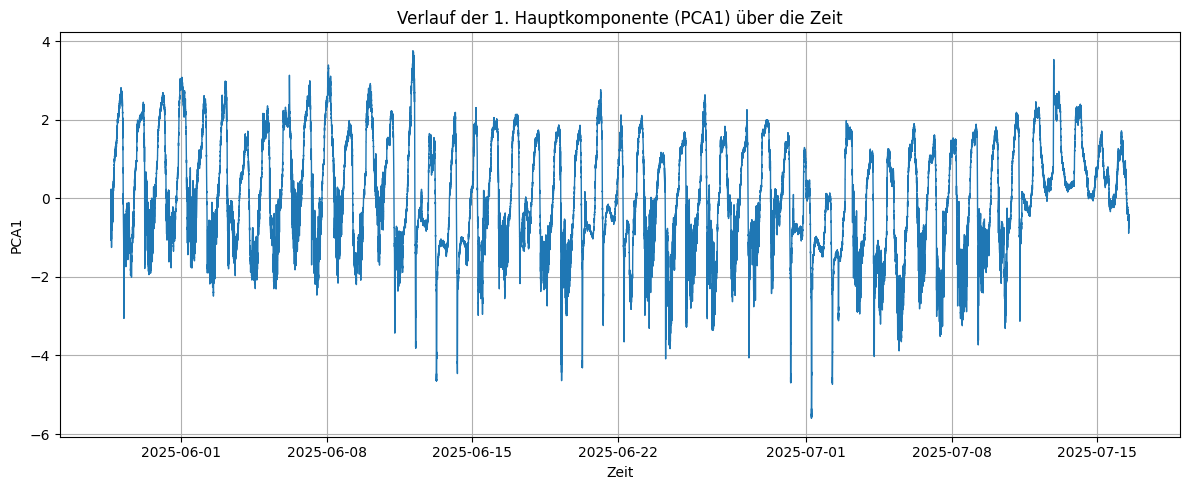

In [32]:
# Zeitstempel als datetime
zeit = pd.to_datetime(df["zeit"])

# Projektion auf die erste Hauptkomponente
X_pca_1d = X_scaled @ eigenvectors[:, 0]  # Nur erste Komponente
pca_df_1d = pd.DataFrame({
    "zeit": zeit,
    "PCA1": X_pca_1d
})

# Plot
plt.figure(figsize=(12, 5))
plt.plot(pca_df_1d["zeit"], pca_df_1d["PCA1"], linewidth=1)
plt.title("Verlauf der 1. Hauptkomponente (PCA1) über die Zeit")
plt.xlabel("Zeit")
plt.ylabel("PCA1")
plt.grid(True)
plt.tight_layout()
plt.show()


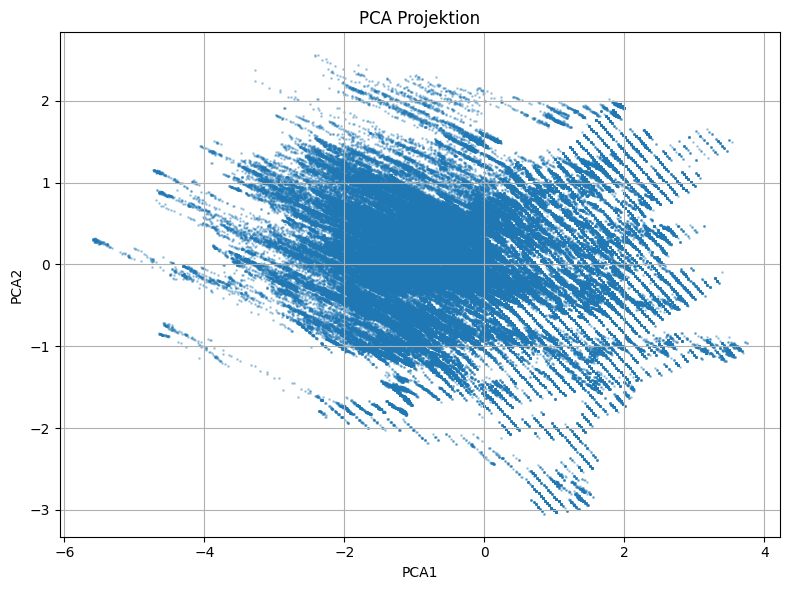

In [33]:
# Projektion auf die ersten 2 Hauptkomponenten
n_components = 2
projection_matrix = eigenvectors[:, :n_components]
X_pca = X_scaled @ projection_matrix

# In DataFrame umwandeln
pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PCA1"], pca_df["PCA2"], alpha=0.3, s=1)
plt.title("PCA Projektion")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()

# # Erklärte Varianz berechnen
# explained_variance_ratio = eigenvalues / np.sum(eigenvalues) # Ideal: >80 % für die ersten 2 Komponenten.
# print("Erklärte Varianz (erste 2 Komponenten):", explained_variance_ratio[:2])
# print("Kumulative erklärte Varianz:", explained_variance_ratio[:2].sum())

# # Erklärte Varianz berechnen
# explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
# cumulative_variance = np.cumsum(explained_variance_ratio)

# # Anzahl Hauptkomponenten nach Kaiser-Kriterium (Eigenwert > 1)
# num_components_kaiser = np.sum(eigenvalues > 1)
# print("Anzahl Hauptkomponenten nach Kaiser-Kriterium:", num_components_kaiser)

# # Plot: kumulative erklärte Varianz
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Kumulative Varianz')
# plt.axhline(y=0.95, color='r', linestyle='--', label='95% Schwelle')
# plt.xlabel('Anzahl Hauptkomponenten')
# plt.ylabel('Kumulative erklärte Varianz')
# plt.title('Kumulative erklärte Varianz vs. Komponentenanzahl')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Plot: Scree-Plot (Eigenwerte)
# plt.figure(figsize=(10, 5))
# plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
# plt.xlabel('Komponente')
# plt.ylabel('Eigenwert')
# plt.title('Scree-Plot (Eigenwerte der PCA)')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


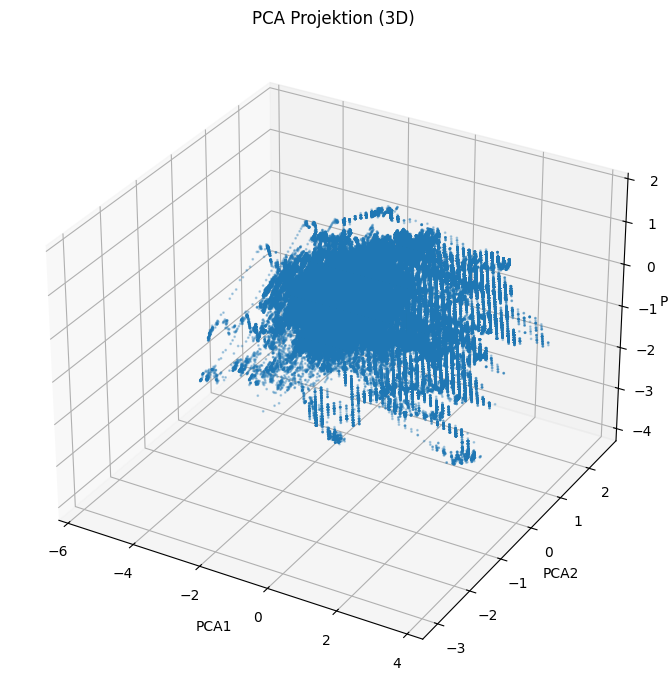

In [34]:
# Projektion auf die ersten 3 Hauptkomponenten
n_components_3d = 3
projection_matrix_3d = eigenvectors[:, :n_components_3d]
X_pca_3d = X_scaled @ projection_matrix_3d

# In DataFrame umwandeln
pca_df_3d = pd.DataFrame(X_pca_3d, columns=["PCA1", "PCA2", "PCA3"])

# 3D-Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d["PCA1"], pca_df_3d["PCA2"], pca_df_3d["PCA3"], alpha=0.3, s=1)

ax.set_title("PCA Projektion (3D)")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.tight_layout()
plt.show()

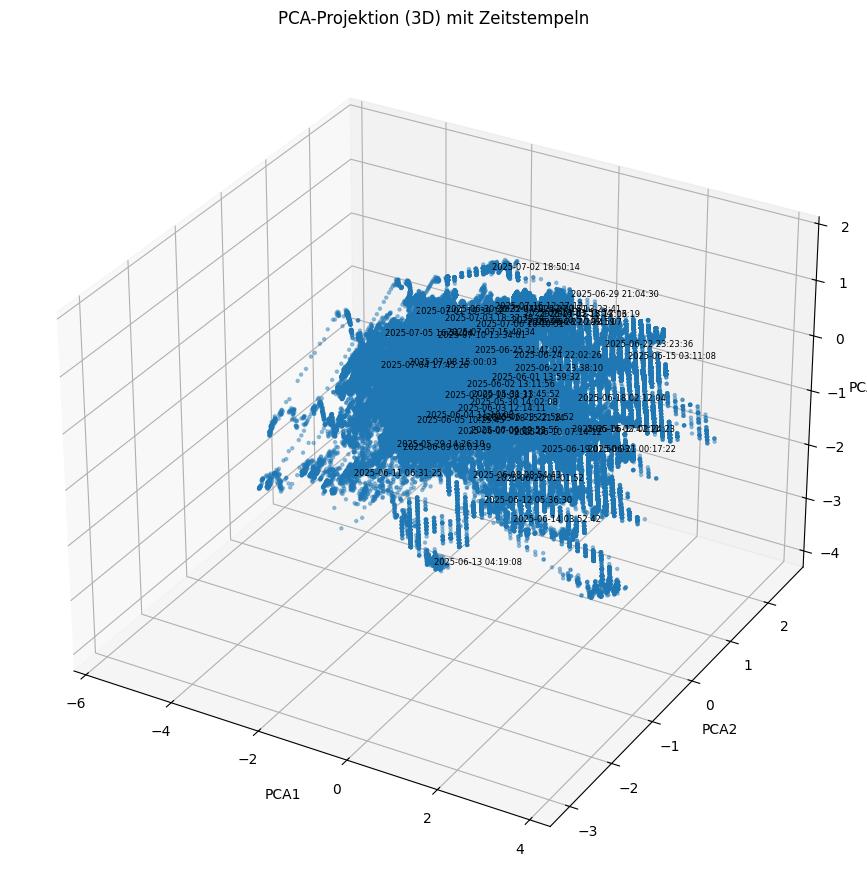

In [35]:
import matplotlib.cm as cm

# Zeitstempel extrahieren
zeit = pd.to_datetime(df["zeit"])

# Projektion auf 3 Hauptkomponenten
X_pca_3d = X_scaled @ eigenvectors[:, :3]
pca_df_3d = pd.DataFrame(X_pca_3d, columns=["PCA1", "PCA2", "PCA3"])
pca_df_3d["zeit"] = zeit.astype(str)  # Zeit als String für Labels

# 3D-Plot mit Zeitstempel-Labels
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3d["PCA1"], pca_df_3d["PCA2"], pca_df_3d["PCA3"], s=5, alpha=0.4)

# Zeitstempel als Text-Labels anzeigen (optional nur jede n-te, um Plot übersichtlich zu halten)
step = len(pca_df_3d) // 50  # z. B. nur jeden 50. Punkt beschriften
for i in range(0, len(pca_df_3d), step):
    x, y, z = pca_df_3d.loc[i, ["PCA1", "PCA2", "PCA3"]]
    label = pca_df_3d.loc[i, "zeit"]
    ax.text(x, y, z, label, size=6)

ax.set_title("PCA-Projektion (3D) mit Zeitstempeln")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.tight_layout()
plt.show()

